#### Optimization Final

In [1]:
using JuMP, CSV, DataFrames

#### Value Stocks

In [2]:
returns = DataFrame(CSV.File("value_healthcare_return.csv",header = true))
cov = DataFrame(CSV.File("value_healthcare_cov.csv",header = true))

Row,Column1,ALKS,AMGN,AMN,CVS,HRMY,HUM,INMD,MOH,PDCO,ROIV
,String7,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,ALKS,0.000431986,6.48209e-5,8.31454e-5,5.09071e-5,0.000120665,2.31565e-5,0.000113866,3.16028e-5,-2.4325e-5,0.000152181
2,AMGN,6.48209e-5,0.000170512,-1.44347e-5,4.5244e-5,3.71841e-5,2.16901e-5,5.67184e-5,4.79852e-5,2.78916e-5,7.69315e-5
3,AMN,8.31454e-5,-1.44347e-5,0.000551276,3.38521e-5,5.18554e-5,5.5478e-6,0.000228827,2.85713e-5,4.8453e-5,4.15594e-5
4,CVS,5.09071e-5,4.5244e-5,3.38521e-5,0.000237176,3.35617e-5,0.000117524,4.04034e-5,0.000116701,7.69108e-5,2.04234e-5
5,HRMY,0.000120665,3.71841e-5,5.18554e-5,3.35617e-5,0.0015616,8.26123e-5,0.000371983,2.77197e-5,0.000124061,0.000246712
6,HUM,2.31565e-5,2.16901e-5,5.5478e-6,0.000117524,8.26123e-5,0.000301093,-3.36428e-5,0.000182832,8.87196e-5,-9.1808e-6
7,INMD,0.000113866,5.67184e-5,0.000228827,4.04034e-5,0.000371983,-3.36428e-5,0.00112331,1.68811e-5,7.26607e-5,0.000299753
8,MOH,3.16028e-5,4.79852e-5,2.85713e-5,0.000116701,2.77197e-5,0.000182832,1.68811e-5,0.000287833,8.55638e-5,1.52642e-5
9,PDCO,-2.4325e-5,2.78916e-5,4.8453e-5,7.69108e-5,0.000124061,8.87196e-5,7.26607e-5,8.55638e-5,0.000440194,-2.29655e-5


In [3]:
returns

Row,Column1,0
,Int64,Float64
1,0,0.114601
2,1,0.148659
3,2,-0.249235
4,3,-0.104893
5,4,-0.323828
6,5,-0.06707
7,6,-0.333643
8,7,0.126821
9,8,0.10693


### Without Short

In [4]:
using Ipopt

ER = returns[:, 2]  # Assuming expected returns are in the first column
C = Matrix(cov[:, 2:end])  # Assuming the first column is labels and the rest are the covariance matrix

n, _ = size(C)

ERp = collect(0.00:0.01:0.5)

result = DataFrame(SDp=NaN,ERp=NaN,x1=NaN,x2=NaN,x3=NaN,x4=NaN,x5=NaN,x6=NaN,x7=NaN,x8=NaN,x9=NaN,x10=NaN)

for k in 1:length(ERp)
    m = Model(optimizer_with_attributes(Ipopt.Optimizer, "print_level" => 0))
    @variable(m, x[1:n] >= 0)
    @NLobjective(m, Min, sum(x[i] * C[i, j] * x[j] for i in 1:n for j in 1:n))
    @NLconstraint(m, sum(ER[i] * x[i] for i in 1:n) == ERp[k])
    @NLconstraint(m, sum(x[i] for i in 1:n) == 1)
    optimize!(m)

    # Create a new row as a tuple
    new_row = (sqrt(objective_value(m)), ERp[k], [round(value(x[i]),digits=4) for i in 1:n]...)
    push!(result, new_row)
end

result


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************



Row,SDp,ERp,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.00911562,0.0,0.0686,0.3545,0.138,0.1491,0.0187,0.1639,0.018,0.0038,0.0786,0.0067
3,0.00908331,0.01,0.0724,0.361,0.1332,0.1396,0.0161,0.1575,0.014,0.0113,0.084,0.0109
4,0.00906293,0.02,0.0759,0.3666,0.1285,0.1301,0.0137,0.1499,0.0102,0.0213,0.089,0.015
5,0.00905445,0.03,0.0793,0.372,0.1236,0.1204,0.0112,0.1421,0.0066,0.0317,0.094,0.0191
6,0.0090579,0.04,0.0828,0.3775,0.1189,0.1108,0.0088,0.1344,0.0028,0.0419,0.0989,0.0231
7,0.00907353,0.05,0.0863,0.3828,0.1131,0.1005,0.0058,0.1267,0.0007,0.0527,0.104,0.0272
8,0.00910216,0.06,0.0899,0.3881,0.1064,0.0893,0.0026,0.1189,0.0002,0.0641,0.1092,0.0313
9,0.00914445,0.07,0.0934,0.3934,0.0989,0.0772,0.0006,0.1101,0.0001,0.0767,0.1142,0.0354


In [8]:
# CSV.write("healthcare_value_noshort.csv", result, delim = ';')

"healthcare_value_noshort.csv"

sys:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


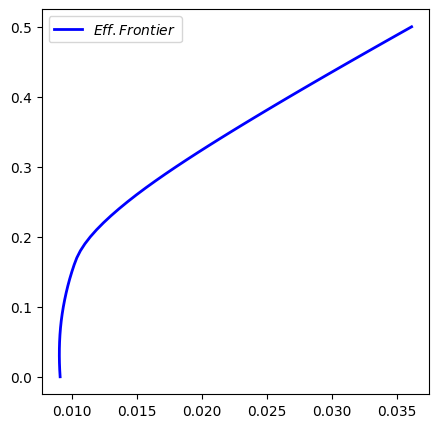

In [5]:
using PyPlot

# Assuming `result` is a previously defined matrix or DataFrame
# where `result[:, :SDp]` represents the x-axis data and `result[:, :ERp]` represents the y-axis data
# Convert data to percentages
x_data = result[:, :SDp]  # Replace `:SDp` with the appropriate column index or name for your x-axis data
y_data = result[:, :ERp]  # Replace `:ERp` with the appropriate column index or name for your y-axis data

# Set the figure size
figure(figsize=(5, 5))  # Width and height in inches

# Plot the efficient frontier
plot(x_data, y_data, color="blue", linewidth=2, label=L"Eff. Frontier")

# Adding legend to the top left
legend(loc="upper left")

# If you want to use LaTeX strings, PyPlot should automatically support them if you have LaTeX installed.
# Otherwise, you can use a string directly for the label, like "Eff. Frontier" if LaTeX is not working.

# Show the plot
show()

#### With Short

In [9]:
using Ipopt

ER = returns[:, 2]  # Assuming expected returns are in the first column
C = Matrix(cov[:, 2:end])  # Assuming the first column is labels and the rest are the covariance matrix

n, _ = size(C)

ERp = collect(0.00:0.01:0.8)

result = DataFrame(SDp=NaN,ERp=NaN,x1=NaN,x2=NaN,x3=NaN,x4=NaN,x5=NaN,x6=NaN,x7=NaN,x8=NaN,x9=NaN,x10=NaN)

for k in 1:length(ERp)
    m = Model(optimizer_with_attributes(Ipopt.Optimizer, "print_level" => 0))
    @variable(m, x[1:n])
    @NLobjective(m, Min, sum(x[i] * C[i, j] * x[j] for i in 1:n for j in 1:n))
    @NLconstraint(m, sum(ER[i] * x[i] for i in 1:n) == ERp[k])
    @NLconstraint(m, sum(x[i] for i in 1:n) == 1)
    optimize!(m)

    # Create a new row as a tuple
    new_row = (sqrt(objective_value(m)), ERp[k], [round(value(x[i]),digits=4) for i in 1:n]...)
    push!(result, new_row)
end

result

Row,SDp,ERp,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0091155,0.0,0.0689,0.3558,0.1379,0.1492,0.0185,0.1655,0.0178,0.0005,0.0791,0.0068
3,0.00908331,0.01,0.0724,0.3612,0.1332,0.1397,0.0161,0.1577,0.0139,0.0108,0.0841,0.0109
4,0.00906293,0.02,0.0759,0.3667,0.1285,0.1301,0.0137,0.1499,0.0101,0.0211,0.089,0.015
5,0.00905444,0.03,0.0793,0.3721,0.1239,0.1206,0.0113,0.1422,0.0062,0.0314,0.094,0.019
6,0.00905789,0.04,0.0828,0.3776,0.1192,0.1111,0.0089,0.1344,0.0024,0.0417,0.0989,0.0231
7,0.00907325,0.05,0.0862,0.383,0.1145,0.1015,0.0065,0.1266,-0.0015,0.052,0.1039,0.0272
8,0.00910047,0.06,0.0897,0.3885,0.1098,0.092,0.0041,0.1188,-0.0053,0.0623,0.1088,0.0313
9,0.00913943,0.07,0.0932,0.3939,0.1051,0.0825,0.0017,0.1111,-0.0092,0.0727,0.1138,0.0353


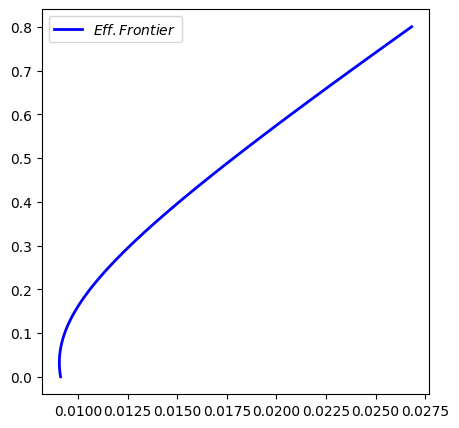

In [10]:
using PyPlot

# Assuming `result` is a previously defined matrix or DataFrame
# where `result[:, :SDp]` represents the x-axis data and `result[:, :ERp]` represents the y-axis data
# Convert data to percentages
x_data = result[:, :SDp]  # Replace `:SDp` with the appropriate column index or name for your x-axis data
y_data = result[:, :ERp]  # Replace `:ERp` with the appropriate column index or name for your y-axis data

# Set the figure size
figure(figsize=(5, 5))  # Width and height in inches

# Plot the efficient frontier
plot(x_data, y_data, color="blue", linewidth=2, label=L"Eff. Frontier")

# Adding legend to the top left
legend(loc="upper left")

# If you want to use LaTeX strings, PyPlot should automatically support them if you have LaTeX installed.
# Otherwise, you can use a string directly for the label, like "Eff. Frontier" if LaTeX is not working.

# Show the plot
show()

In [11]:
# CSV.write("healthcare_value_short.csv", result, delim = ';')

"healthcare_value_short.csv"

#### Growth Stocks

In [12]:
returns = DataFrame(CSV.File("growth_healthcare_return.csv",header = true))
cov = DataFrame(CSV.File("growth_healthcare_cov.csv",header = true))

Row,Column1,ABBV,BDX,BMRN,BSX,COO,DXCM,IDXX,ISRG,LLY,VEEV
,String7,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,ABBV,0.000152159,3.90942e-5,5.08432e-5,2.45993e-5,2.07146e-5,1.78348e-5,2.18688e-5,3.20382e-5,3.48308e-5,-5.28765e-6
2,BDX,3.90942e-5,0.000147893,4.29352e-5,5.92823e-5,5.90481e-5,4.71593e-5,7.53732e-5,6.94618e-5,6.7507e-5,9.3329e-5
3,BMRN,5.08432e-5,4.29352e-5,0.000358196,3.02311e-5,5.94171e-5,8.58367e-5,0.00010126,7.74948e-5,4.58845e-5,7.55475e-5
4,BSX,2.45993e-5,5.92823e-5,3.02311e-5,0.000159195,7.6553e-5,0.000104711,7.60804e-5,0.000122497,3.73446e-5,4.81208e-5
5,COO,2.07146e-5,5.90481e-5,5.94171e-5,7.6553e-5,0.000207678,0.000120249,0.000141544,0.000136467,2.43349e-5,0.000127648
6,DXCM,1.78348e-5,4.71593e-5,8.58367e-5,0.000104711,0.000120249,0.000645154,0.000160323,0.000231225,-4.25149e-5,0.000102875
7,IDXX,2.18688e-5,7.53732e-5,0.00010126,7.60804e-5,0.000141544,0.000160323,0.00037464,0.00019193,5.31464e-5,0.000170766
8,ISRG,3.20382e-5,6.94618e-5,7.74948e-5,0.000122497,0.000136467,0.000231225,0.00019193,0.000329985,3.6182e-5,0.000109944
9,LLY,3.48308e-5,6.7507e-5,4.58845e-5,3.73446e-5,2.43349e-5,-4.25149e-5,5.31464e-5,3.6182e-5,0.000330003,6.1121e-5


In [13]:
returns

Row,Column1,0
,Int64,Float64
1,0,0.0168987
2,1,-0.00845615
3,2,-0.0268915
4,3,0.244511
5,4,0.162139
6,5,0.172923
7,6,0.357362
8,7,0.283336
9,8,0.520292


### Without Short

In [14]:
using Ipopt

ER = returns[:, 2]  # Assuming expected returns are in the first column
C = Matrix(cov[:, 2:end])  # Assuming the first column is labels and the rest are the covariance matrix

n, _ = size(C)

ERp = collect(0.00:0.01:0.5)

result = DataFrame(SDp=NaN,ERp=NaN,x1=NaN,x2=NaN,x3=NaN,x4=NaN,x5=NaN,x6=NaN,x7=NaN,x8=NaN,x9=NaN,x10=NaN)

for k in 1:length(ERp)
    m = Model(optimizer_with_attributes(Ipopt.Optimizer, "print_level" => 0))
    @variable(m, x[1:n] >= 0)
    @NLobjective(m, Min, sum(x[i] * C[i, j] * x[j] for i in 1:n for j in 1:n))
    @NLconstraint(m, sum(ER[i] * x[i] for i in 1:n) == ERp[k])
    @NLconstraint(m, sum(x[i] for i in 1:n) == 1)
    optimize!(m)

    # Create a new row as a tuple
    new_row = (sqrt(objective_value(m)), ERp[k], [round(value(x[i]),digits=4) for i in 1:n]...)
    push!(result, new_row)
end

result

Row,SDp,ERp,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.00936391,0.0,0.3766,0.4595,0.1539,0.0001,0.0079,0.0019,0.0,0.0,0.0,0.0
3,0.00911995,0.01,0.3749,0.4221,0.1366,0.0001,0.0561,0.0102,0.0,0.0,0.0,0.0
4,0.00893634,0.02,0.3704,0.3893,0.124,0.016,0.085,0.015,0.0,0.0001,0.0,0.0001
5,0.00878273,0.03,0.363,0.3615,0.1168,0.0507,0.0931,0.0146,0.0,0.0,0.0,0.0001
6,0.00865544,0.04,0.356,0.3338,0.1097,0.0847,0.1001,0.0142,0.0,0.0,0.0,0.0013
7,0.00855356,0.05,0.3503,0.3059,0.1026,0.1163,0.1043,0.0136,0.0,0.0,0.0001,0.0067
8,0.00847474,0.06,0.3455,0.2808,0.0963,0.1406,0.1061,0.0135,0.0,0.0,0.0036,0.0135
9,0.00840936,0.07,0.3405,0.2633,0.0919,0.1502,0.1068,0.0148,0.0,0.0,0.016,0.0163


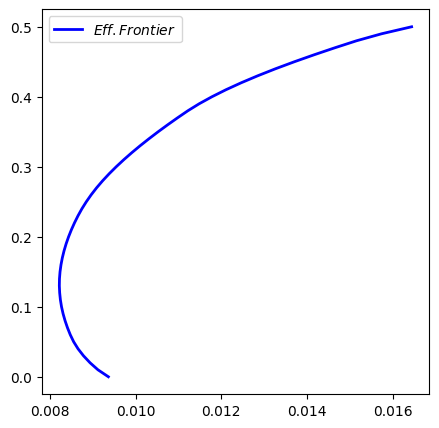

In [15]:
using PyPlot

# Assuming `result` is a previously defined matrix or DataFrame
# where `result[:, :SDp]` represents the x-axis data and `result[:, :ERp]` represents the y-axis data
# Convert data to percentages
x_data = result[:, :SDp]  # Replace `:SDp` with the appropriate column index or name for your x-axis data
y_data = result[:, :ERp]  # Replace `:ERp` with the appropriate column index or name for your y-axis data

# Set the figure size
figure(figsize=(5, 5))  # Width and height in inches

# Plot the efficient frontier
plot(x_data, y_data, color="blue", linewidth=2, label=L"Eff. Frontier")

# Adding legend to the top left
legend(loc="upper left")

# If you want to use LaTeX strings, PyPlot should automatically support them if you have LaTeX installed.
# Otherwise, you can use a string directly for the label, like "Eff. Frontier" if LaTeX is not working.

# Show the plot
show()

In [16]:
# CSV.write("healthcare_growth_noshort.csv", result, delim = ';')

"healthcare_growth_noshort.csv"

#### With Short

In [17]:
using Ipopt

ER = returns[:, 2]  # Assuming expected returns are in the first column
C = Matrix(cov[:, 2:end])  # Assuming the first column is labels and the rest are the covariance matrix

n, _ = size(C)

ERp = collect(0.00:0.01:0.8)

result = DataFrame(SDp=NaN,ERp=NaN,x1=NaN,x2=NaN,x3=NaN,x4=NaN,x5=NaN,x6=NaN,x7=NaN,x8=NaN,x9=NaN,x10=NaN)

for k in 1:length(ERp)
    m = Model(optimizer_with_attributes(Ipopt.Optimizer, "print_level" => 0))
    @variable(m, x[1:n])
    @NLobjective(m, Min, sum(x[i] * C[i, j] * x[j] for i in 1:n for j in 1:n))
    @NLconstraint(m, sum(ER[i] * x[i] for i in 1:n) == ERp[k])
    @NLconstraint(m, sum(x[i] for i in 1:n) == 1)
    optimize!(m)

    # Create a new row as a tuple
    new_row = (sqrt(objective_value(m)), ERp[k], [round(value(x[i]),digits=4) for i in 1:n]...)
    push!(result, new_row)
end

result

Row,SDp,ERp,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.00886685,0.0,0.3618,0.3574,0.1253,0.1437,0.1566,0.0331,-0.0651,-0.0846,-0.0429,0.0147
3,0.00876601,0.01,0.3576,0.3418,0.1208,0.1504,0.1544,0.0334,-0.0597,-0.083,-0.0318,0.0161
4,0.00867239,0.02,0.3535,0.3262,0.1163,0.1571,0.1523,0.0336,-0.0543,-0.0815,-0.0208,0.0176
5,0.00858623,0.03,0.3493,0.3106,0.1117,0.1639,0.1502,0.0339,-0.049,-0.0799,-0.0097,0.019
6,0.00850775,0.04,0.3452,0.2949,0.1072,0.1706,0.148,0.0342,-0.0436,-0.0783,0.0013,0.0205
7,0.00843716,0.05,0.341,0.2793,0.1027,0.1773,0.1459,0.0345,-0.0382,-0.0767,0.0124,0.022
8,0.00837468,0.06,0.3369,0.2637,0.0982,0.184,0.1437,0.0348,-0.0329,-0.0752,0.0235,0.0234
9,0.00832046,0.07,0.3327,0.248,0.0936,0.1907,0.1416,0.0351,-0.0275,-0.0736,0.0345,0.0249


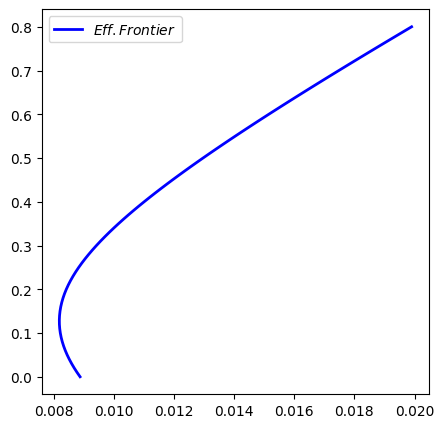

In [18]:
using PyPlot

# Assuming `result` is a previously defined matrix or DataFrame
# where `result[:, :SDp]` represents the x-axis data and `result[:, :ERp]` represents the y-axis data
# Convert data to percentages
x_data = result[:, :SDp]  # Replace `:SDp` with the appropriate column index or name for your x-axis data
y_data = result[:, :ERp]  # Replace `:ERp` with the appropriate column index or name for your y-axis data

# Set the figure size
figure(figsize=(5, 5))  # Width and height in inches

# Plot the efficient frontier
plot(x_data, y_data, color="blue", linewidth=2, label=L"Eff. Frontier")

# Adding legend to the top left
legend(loc="upper left")

# If you want to use LaTeX strings, PyPlot should automatically support them if you have LaTeX installed.
# Otherwise, you can use a string directly for the label, like "Eff. Frontier" if LaTeX is not working.

# Show the plot
show()

In [19]:
# CSV.write("healthcare_growth_short.csv", result, delim = ';')

"healthcare_growth_short.csv"